In [ ]:
# 영상신호처리 Homework4 
# 2020451142 정수영

In [ ]:
# import libraries
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import cv2

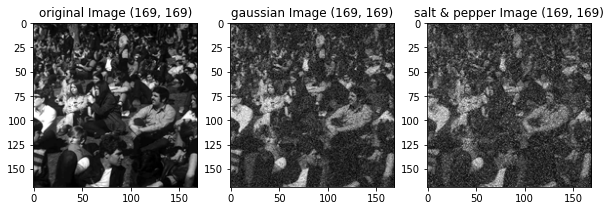

In [ ]:
# Original Image
original_f = cv2.imread("/content/drive/MyDrive/Colab Notebooks/영상처리/datas/original.png", cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(10, 30))
plt.subplot(1, 3, 1)
plt.imshow(original_f, cmap="gray", vmin=0, vmax=255 )
plt.title("original Image " + str(original_f.shape))

# Gaussian Noise 30% Image
gaussian_f = cv2.imread("/content/drive/MyDrive/Colab Notebooks/영상처리/datas/gaussian_noise.png", cv2.IMREAD_GRAYSCALE)
plt.subplot(1, 3, 2)
plt.imshow(gaussian_f, cmap="gray")
plt.title("gaussian Image " + str(gaussian_f.shape))

# Salt & Pepper Noise 30% Image
saltpepper_f = cv2.imread("/content/drive/MyDrive/Colab Notebooks/영상처리/datas/salt_pepper_noise.png", cv2.IMREAD_GRAYSCALE)
plt.subplot(1, 3, 3)
plt.imshow(saltpepper_f, cmap="gray")
plt.title("salt & pepper Image " + str(saltpepper_f.shape))

plt.show()  # 이미지 출력

In [ ]:
# Fourier Formular
def Fourier(N, x, a):
  return  complex(sp.cos((2. * sp.pi * x * a)/N), -1.*sp.sin((2. * sp.pi * x * a)/N))/np.sqrt(N)

# Define DFT function T()
# DFT (Discrete Fourier Transform)
def T(N):
  U = []
  for i in range(N):
    row = []
    for j in range(N):
      row.append(Fourier(N, i, j))
    U.append(row)
  return np.array(U)

In [ ]:
# DFT와 IDFT를 간단하게 구하는 함수
def GetDFT(matrix, DFT):
  return np.dot(DFT, np.dot(matrix, np.matrix.getH(DFT)))
  
def GetIDFT(matrix, DFT):
  return np.dot(np.matrix.getH(DFT), np.dot(matrix, DFT))

In [ ]:
# linear Lowpass Filter 구하는 함수
# fc: cutoff frequency
# N : scale of filter
def LowpassFilter(fc, N):
    taps = np.zeros((N,N))
    middle = int(N/2)
    for i in range(N):
      if i == middle:
        taps[middle][middle] = fc/np.pi
      else:
        # Ex 4.1 공식
        taps[i][middle] = np.sin(fc * (i-middle))/(np.pi*(i-middle))
        taps[middle][i] = taps[i][middle]

    for i in range(N):
      for j in range(N):
        if i != middle and j != middle:
          taps[i][j] = taps[i][middle] * taps[middle][j]
        
    return taps

In [ ]:
# 5*5 Linear Lowpass Filter를 출력해본다. 
np.round_(LowpassFilter(np.pi/2, 5), 5)

array([[0.     , 0.     , 0.     , 0.     , 0.     ],
       [0.     , 0.10132, 0.31831, 0.10132, 0.     ],
       [0.     , 0.31831, 0.5    , 0.31831, 0.     ],
       [0.     , 0.10132, 0.31831, 0.10132, 0.     ],
       [0.     , 0.     , 0.     , 0.     , 0.     ]])

In [ ]:
# Lowpass Filter를 이용하여 필터링하는 함수
def LowpassFiltering(image, K):
  if K % 2 != 1: return  # K가 홀수가 아니면 리턴
  new_image = np.copy(image)
  term = int(K/2)
  DFT = T(K)
  lowpass_filter = GetDFT(LowpassFilter(np.pi/2, K), DFT)

  for i in range(term, image.shape[0]-term):
    for j in range(term, image.shape[1]-term):
      subimage = image[i-term:i+term+1, j-term:j+term+1]
      DFT_subimage = GetDFT(image[i-term:i+term+1, j-term:j+term+1], DFT)
      new_image[i-term:i+term+1, j-term:j+term+1] = GetIDFT(lowpass_filter * DFT_subimage, DFT)

  return new_image

In [ ]:
# 원래 이미지와 필터된 이미지를 함께 출력하는 함수
def DrawImages(noised_image, filtered_image):
  plt.figure(figsize=(8, 8))
  plt.subplot(2, 2, 1)
  plt.imshow(noised_image, cmap="gray")
  plt.title("Noised Image")
  plt.subplot(2, 2, 2)
  plt.imshow(filtered_image, cmap="gray")
  plt.title("Filtered Image")
  plt.show()

In [ ]:
# Median Filter(가운데 값) 구하는 함수
def MedianFilter(subimage):
  N = int(subimage.shape[0]/2)
  median = np.median(subimage)
  return median

In [ ]:
# Median 필터링
def MedianFiltering(image, K):
  if K % 2 != 1: return  # K가 홀수가 아니면 리턴
  new_image = np.copy(image)
  start_index = int(K/2)
  end_index = image.shape[0] - int(K/2)
  for i in range(start_index, end_index):
    for j in range(start_index, end_index):
      new_image[i][j] = MedianFilter(image[i-start_index:i+start_index+1, j-start_index:j+start_index+1])
  return new_image

Gaussian Noise to MedianFiltering


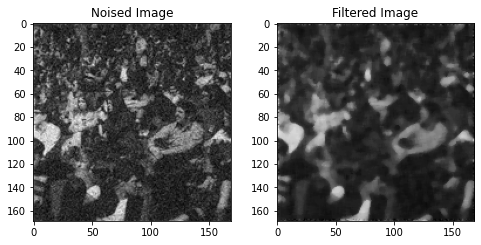

In [ ]:
# Gaussian Noise to MedianFiltering
image = gaussian_f
print("Gaussian Noise to MedianFiltering")
DrawImages(image, MedianFiltering(image, 5))

Salt&Pepper Noise to MedianFiltering


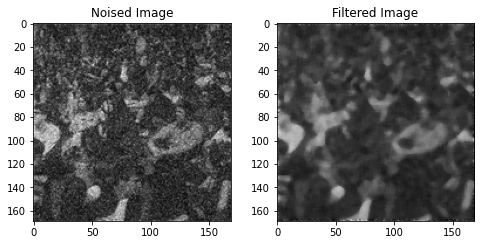

In [ ]:
# Salt&Pepper Noise to MedianFiltering
image = saltpepper_f
print("Salt&Pepper Noise to MedianFiltering")
DrawImages(image, MedianFiltering(image, 5))

Gaussian Noise to Linear LowpassFiltering


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: ComplexWarning: Casting complex values to real discards the imaginary part
  del sys.path[0]


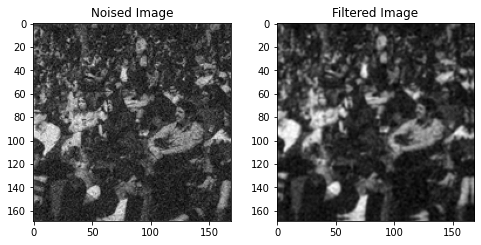

In [ ]:
# Gaussian Noise to Linear LowpassFiltering
image = gaussian_f
print("Gaussian Noise to Linear LowpassFiltering")
DrawImages(image, np.abs(LowpassFiltering(image, 5)))

Salt&Pepper Noise to Linear LowpassFiltering


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: ComplexWarning: Casting complex values to real discards the imaginary part
  del sys.path[0]


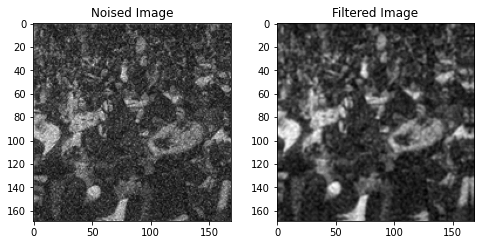

In [ ]:
# Salt&Pepper Noise to Linear LowpassFiltering
image = saltpepper_f
print("Salt&Pepper Noise to Linear LowpassFiltering")
DrawImages(image, LowpassFiltering(image, 5))